#Student Name: Chelliah Kanthanathan
#Student ID: 18263003

Observation period in days: 3650
Total number of Stock Transactions:  104361000

Expected stock transaction per day: 28000
Variation above expected stock transaction in %: 50.79452054794521

Standard Deviation: 7496.073302463209
Median Daily stock transactionn: 29000.0
Average Daily stock transactionn: 28592.054794520547


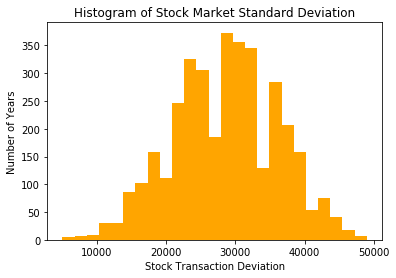

In [5]:
import random
import numpy as np
import matplotlib.pyplot as plt

class Daily_stockmarket():
    """This class populates daily transactions for every company listed in stock market.
    It randomly select the number of transaction from list using random.choice()
    This class also notes down the total number of transaction per day"""
    
    companies = ['Apple','Google','Samsung','Microsoft','Amazon']
    no_of_transaction = ['1000','2000','5000','7000','9000','10000']
    
    def __init__(self):
        self.stock_market = {}
        self.total_no_of_daily_transactions = 0
        
    def populate_stock_market_daily_transaction(self):
        for company in range(len(self.companies)):
            self.stock_market[self.companies[company]] = random.choice(self.no_of_transaction)   
            self.total_no_of_daily_transactions += int(self.stock_market[self.companies[company]])
    
    def print_stock_market_data(self):
        print (self.stock_market)
        print (self.total_no_of_daily_transactions)
        
    def return_total_no_of_daily_transactions(self):
        return self.total_no_of_daily_transactions

class Simulate_observation():
    """This class has function simulation that takes number of days for observation and 
    simulate daily stock market transactions for every day. Then the observations are 
    stored in a list which represent total number of transactions per day over a number 
    of days. It also notes down the variation count greater than expected transaction """
    
    def __init__(self,no_of_days):
        self.no_of_days = no_of_days
        self.observations = []
        self.total_transaction = 0
        self.variation_count = 0
        self.expected_transaction_per_Day = 28000
        
    def simulation(self):
        for i in range(self.no_of_days):
            daily_stock_market = Daily_stockmarket()
            daily_stock_market.populate_stock_market_daily_transaction()
            self.observations.append(daily_stock_market.return_total_no_of_daily_transactions())
            if (daily_stock_market.return_total_no_of_daily_transactions() > self.expected_transaction_per_Day):
                self.variation_count += 1
            self.total_transaction += daily_stock_market.return_total_no_of_daily_transactions()
        
    def return_observations(self):
        return self.observations
    
    def return_expected_transaction_per_day(self):
        return self.expected_transaction_per_Day
    
    def return_total_transaction(self):
        return self.total_transaction
    
    def calculate_variation(self):
        return (self.variation_count / self.no_of_days) * 100

# Main
if __name__ == "__main__":
    
    # Randomly select the period of observation
    no_of_days = [365,1825,3650] # 1year, 5 years, 10 years
    observation_period = random.choice(no_of_days) 
    
    # Simulate observation for selected obervation period
    simulate = Simulate_observation(observation_period)
    simulate.simulation()
    
    # Calculate variation from expected transaction
    # Calcualte average transaction, median daily transaction and standard deviation for observation period
    variation_with_expected_transaction = simulate.calculate_variation()
    average_daily_transaction = simulate.return_total_transaction() / observation_period
    median_daily_transaction = np.median(simulate.return_observations())
    standard_deviation = np.std(simulate.return_observations())
    
    # print the output
    print ("Observation period in days:", observation_period)
    print ("Total number of Stock Transactions: ", simulate.return_total_transaction())
    
    print ("\nExpected stock transaction per day:", simulate.return_expected_transaction_per_day())
    print ("Variation above expected stock transaction in %:", variation_with_expected_transaction)
    print ("\nStandard Deviation:", standard_deviation)
    print ("Median Daily stock transactionn:", median_daily_transaction)
    print ("Average Daily stock transactionn:", average_daily_transaction)
    
    # Plot the deviation for observation period
    num_bins = 25
    plt.xlabel('Stock Transaction Deviation')
    plt.ylabel('Number of Years')
    plt.title('Histogram of Stock Market Standard Deviation')
    plt.hist(simulate.return_observations(),num_bins,facecolor='orange')
    plt.show()